# Iterated Prisioners Dilemma Tournament

Using the [Alexrod-Python](https://github.com/Axelrod-Python) library

Group Project for COMP 3710

By: Mio Tanaka, Suraiya Khanda, Samar Houssami, Ben Davidson

## Import the axelrod library

In [83]:
import axelrod as axl
%matplotlib inline

## Prepare the tournament

In [84]:
axl.seed(0)

# players = [s() for s in axl.demo_strategies]
players = [axl.Cooperator(), axl.Defector(), 
           axl.TitForTat(), axl.Grudger()]
tournament = axl.Tournament(players)
tournament.name = 'IPDP for COMP 3710'
tournament.turns = 200                        # set the number of turns
tournament.repetitions = 10                   # number of times to repeat
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 64.08it/s]


## Tournament '{{tournament.name}}' 
Ran for {{tournament.turns}} turns and repeated {{tournament.repetitions}} times

In [85]:
print("The players were: ")
print(results.players)


print("\nTheir final ranking was: ")
print(results.ranked_names)


The players were: 
['Cooperator', 'Defector', 'Tit For Tat', 'Grudger']

Their final ranking was: 
['Defector', 'Tit For Tat', 'Grudger', 'Cooperator']


## Detailed Results 

### For each round, how many times did each strategy win?



In [86]:
i = 0 
for e in results.wins:
    print( "{0:>15}".format(results.players[i]) + " " + str(e) )
    i += 1


     Cooperator [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
       Defector [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
    Tit For Tat [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        Grudger [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### For each round, what were the scores?

In [87]:
i = 0 
for s in results.scores:
    print("{0:>15} ".format(results.players[i]) + " " + str(s) )
    i += 1


     Cooperator  [1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200]
       Defector  [1408, 1408, 1408, 1408, 1408, 1408, 1408, 1408, 1408, 1408]
    Tit For Tat  [1399, 1399, 1399, 1399, 1399, 1399, 1399, 1399, 1399, 1399]
        Grudger  [1399, 1399, 1399, 1399, 1399, 1399, 1399, 1399, 1399, 1399]


### Okay, pretty good, now let's normalize those scores...

In [88]:
i = 0 

for r in results.normalised_scores:
    e = []
    for c in r:
        e += [ float('{0:.2f}'.format(c ))]
    print("{0:>15} {1:} ".format(results.players[i], e ) )
    i += 1
    
# results.normalised_scores

     Cooperator [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0] 
       Defector [2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35] 
    Tit For Tat [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33] 
        Grudger [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33] 


This means that **{{results.players[0]}}** got, on average, a score of **{{results.normalised_scores[0][0]}}** per turn, per opponent

## So who did well against who?

In [89]:
player = 0 
opponent = 0

for r in results.score_diffs:
    print("{:_<88}".format(results.players[player] + " vs "))
    opponent = 0
    for opp in r:
        e = []
        for c in opp:
            e += [ float('{0:2.2f}'.format(c ))]
        print("{0:>15} {1:} ".format(results.players[opponent], e ) )
        opponent += 1
    player += 1
    print()
          
# results.score_diffs

Cooperator vs __________________________________________________________________________
     Cooperator [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
       Defector [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0] 
    Tit For Tat [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
        Grudger [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

Defector vs ____________________________________________________________________________
     Cooperator [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0] 
       Defector [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
    Tit For Tat [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03] 
        Grudger [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03] 

Tit For Tat vs _________________________________________________________________________
     Cooperator [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
       Defector [-0.03, -0.03, -0.03, -0.03, -0.03, -0.03, -0.03, -0.03, -0.03, -0.03] 
 

We can see that **Cooperator** is at a big disadvantage to **Defector**. 

## When do different strategies cooperate?

In [90]:
i = 0 

# Headers for the columns
print("{:17}".format(''), end ='')
for player in results.players:
    print("{:.3s} {:1}".format(player, ''), end='')
print()

# Rows
for r in results.normalised_cooperation:
    e = []
    for c in r:
        e += [ float('{0:.2f}'.format(c ))]
    print("{0:>15} {1:} ".format(results.players[i], e ) )
    i += 1

# results.normalised_cooperation

                 Coo  Def  Tit  Gru  
     Cooperator [1.0, 1.0, 1.0, 1.0] 
       Defector [0.0, 0.0, 0.0, 0.0] 
    Tit For Tat [1.0, 0.01, 1.0, 1.0] 
        Grudger [1.0, 0.01, 1.0, 1.0] 


## Let's send the main data to a .csv file

In [91]:
results.write_summary('summary.csv')
# import csv
# with open('summary.csv', 'r') as outfile:
#     csvreader = csv.reader(outfile)
#     for row in csvreader:
#         print(row)

# Now let's visualize the results

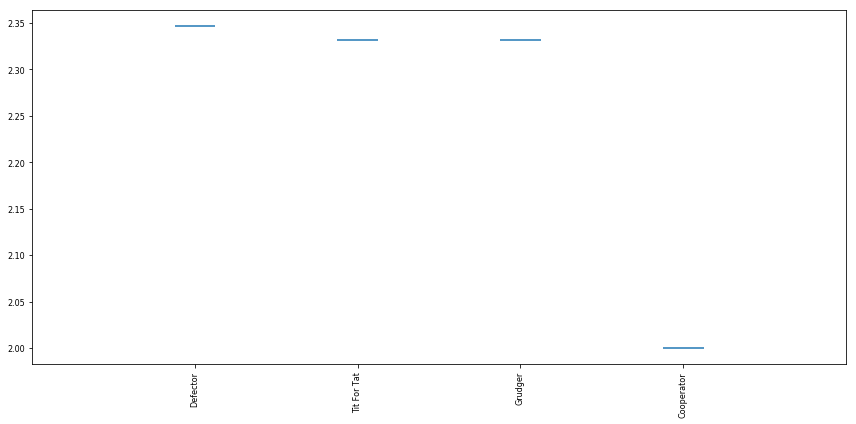

In [92]:
plot = axl.Plot(results)
b = plot.boxplot()

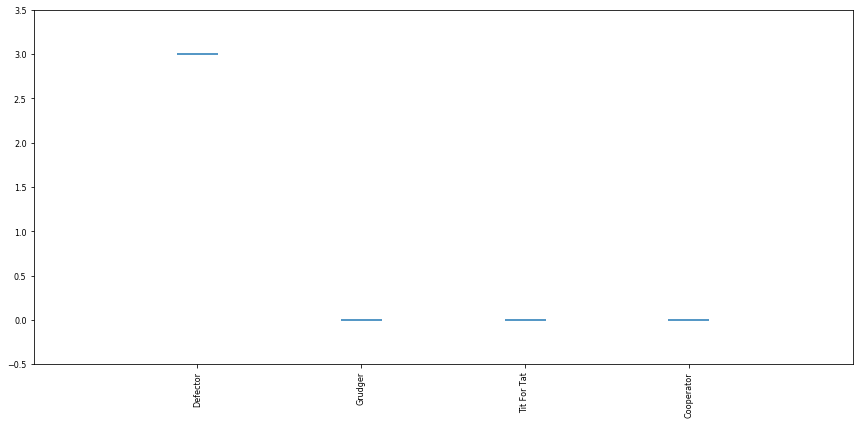

In [93]:
p = plot.winplot()

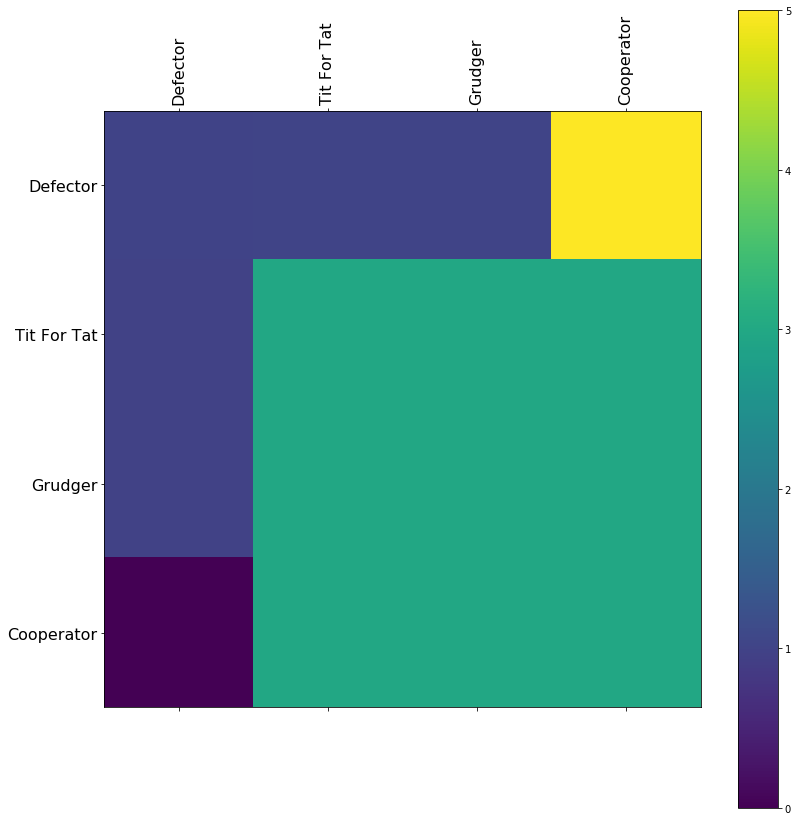

In [94]:
pay = plot.payoff()

# Finally, let's save a copy of our graphs

In [95]:
axl.Plot.save_all_plots(plot)

Obtaining plots: 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]
